In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import*
from sklearn import pipeline
from sklearn.preprocessing import*
from sklearn.decomposition import*
from sklearn.manifold import*
from sklearn.ensemble import*
from sklearn.metrics import*
from sklearn import*
import catboost as ctb
import lightgbm as lgb
plt.rcParams['figure.figsize'] = (20, 15)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re
from tqdm import*
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import*
from tensorflow.keras.layers import*
import datetime as dt
import gc
from time import*
from bayes_opt import *
import h2o
from h2o.automl import H2OAutoML
plt.style.use('ggplot')
tqdm.pandas()

In [2]:
#import datasets

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
train_idx=df_train.shape[0]

In [5]:
#Train+test for more eazy eda and features

In [6]:
df = pd.concat([df_train.drop('SalePrice',axis=1),df_test])
print(df.shape)
df.head()

(2919, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
targ = df_train['SalePrice']


In [8]:
df.index= df.pop('Id')

In [9]:
#check objects to find ones that can't be obj
df.select_dtypes(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2916,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml


In [10]:
#check non objects to find ones that can be obj
df.select_dtypes(exclude='O')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006


In [11]:
#binar class for rare items
for j,column in tqdm_notebook(enumerate(df.select_dtypes(exclude='O').columns)):
  if df[column].quantile(0.9)==0:
    df[column] = df[column].apply(lambda x: 0 if x==0 else 1).astype('O')
    print(j,column)

14LowQualFinSF
17BsmtHalfBath
303SsnPorch
31ScreenPorch
32PoolArea
33MiscVal



In [12]:
# to obj low var int
for j,column in tqdm_notebook(enumerate(df.select_dtypes(exclude='O').columns)):
  if df[column].value_counts().shape[0]<20:
    df[column] = df[column].astype('O')
    print(j,column)

0MSSubClass
3OverallQual
4OverallCond
15BsmtFullBath
16FullBath
17HalfBath
18BedroomAbvGr
19KitchenAbvGr
20TotRmsAbvGrd
21Fireplaces
23GarageCars
28MoSold
29YrSold



In [13]:
#EDA non- object

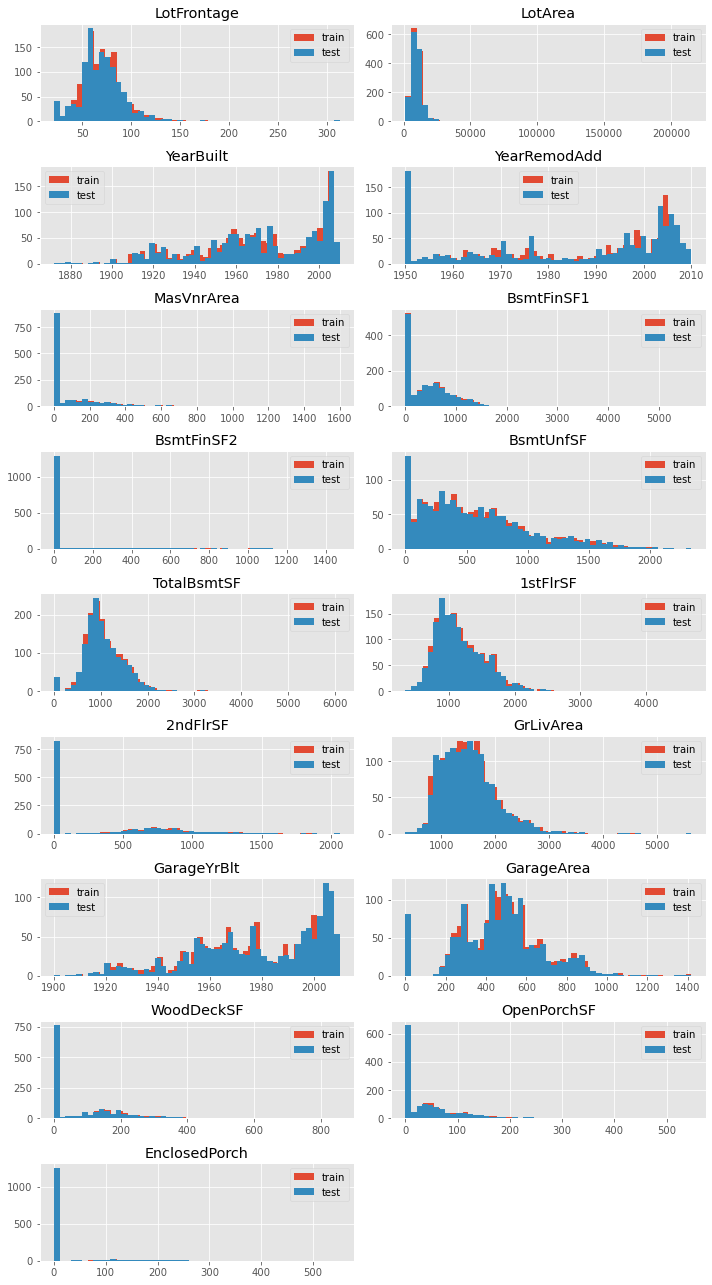

In [14]:
fig = plt.figure(figsize=(10,15*2.5))
for j,column in tqdm_notebook(enumerate(df.select_dtypes(exclude='O').columns)):
  ax=fig.add_subplot(19,2,j+1)
  ax.set_title(column)
  df[column][:train_idx].hist(bins=50,ax=ax)
  df[column][:train_idx].hist(bins=51,ax=ax)
  plt.legend(['train','test'])
  plt.tight_layout()

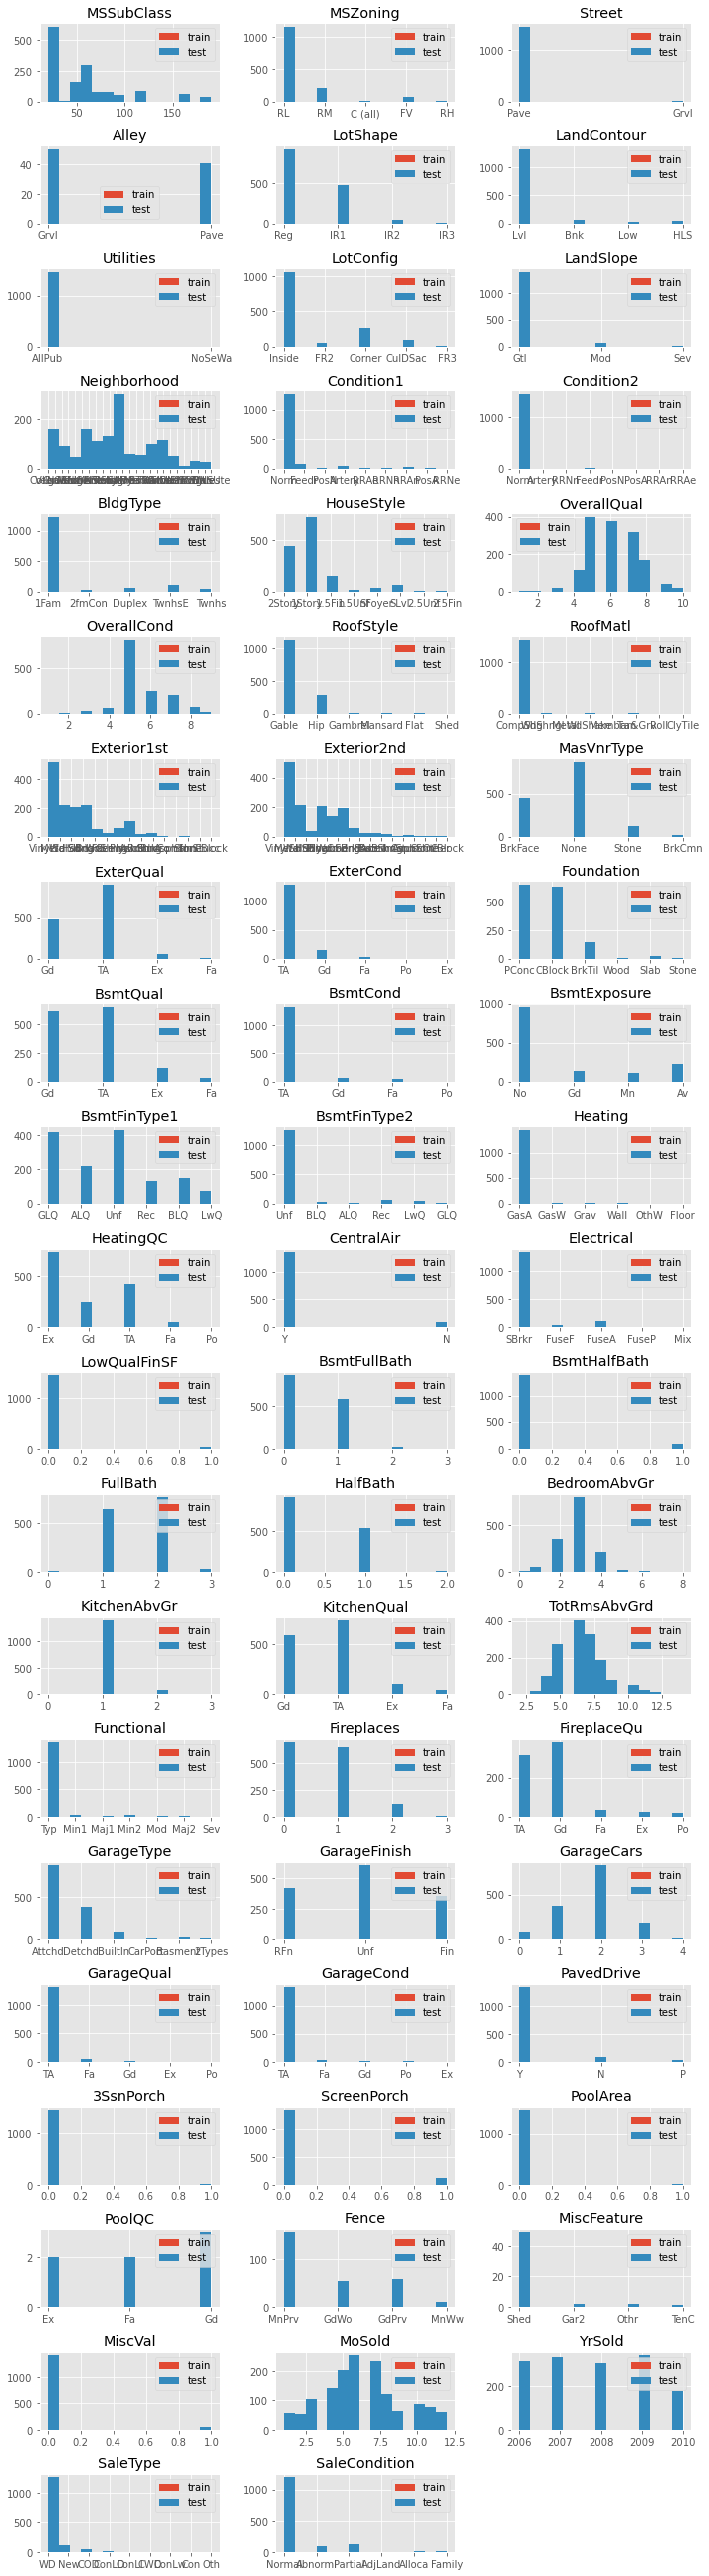

In [15]:
fig = plt.figure(figsize=(10,15*2.5))
for j,column in tqdm_notebook(enumerate(df.select_dtypes(include='O').columns)):
  ax=fig.add_subplot(22,3,j+1)
  ax.set_title(column)
  df[column][:train_idx].hist(bins=15,ax=ax)
  df[column][:train_idx].hist(bins=15,ax=ax)
  plt.legend(['train','test'])
  plt.tight_layout()

In [16]:
#Filling_na's

In [17]:
for i in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']:
 df[i]=df[i].fillna('none')

In [18]:
for i in [x for x in df if df[x].isna().any()==True]:
  if df[i].dtype == 'O': 
    df[i] = df.groupby(['Neighborhood'])[i].apply(lambda x: x.fillna((x.mode())))
    df[i]=df[i].fillna(df[i].mode()[0])
  else: df[i]=impute.KNNImputer().fit_transform(np.array(df[i]).reshape(-1,1))

In [19]:
#FE on num

In [20]:
df.shape

(2919, 79)

In [21]:
df['sec_floor'] = df['2ndFlrSF'].apply(lambda x: 0 if x==0 else 1).astype('O')

In [22]:
df['Bmnt_bath'] = (df['BsmtFullBath']+df['BsmtHalfBath']*0.5).astype('O')
df['Bmnt_bath'] = df['Bmnt_bath'].astype('O')

In [23]:
df['TotalFlrSF'] = df[['1stFlrSF','2ndFlrSF','TotalBsmtSF']].sum(axis=1)

In [24]:
df.GarageYrBlt = df.GarageYrBlt.astype('O')

In [25]:
df['CapRepear'] = df['YearRemodAdd']-df['YearBuilt']
df['CapRepear']=df['CapRepear'].apply(lambda x: 1 if x > 0 else 0)
df['CapRepear'] = df['CapRepear'].astype('O')

In [26]:
df['decade']=pd.qcut(df['YearBuilt'],10)
df['decade'] = df['decade'].factorize()[0].astype('O')

In [27]:
df_mani = df.copy()

In [28]:
from collections import defaultdict  as dd

In [29]:
d = dd(LabelEncoder)

In [30]:
df_mani[df_mani.select_dtypes('O').columns]=df_mani.select_dtypes('O').apply(lambda x : d[x.name].fit_transform(x))

In [31]:
df_lle = pd.DataFrame(manifold.LocallyLinearEmbedding(n_components=3).fit_transform(df_mani),columns=['x','y','z'])

In [32]:
optics_lle = cluster.OPTICS(min_cluster_size=300).fit(df_lle)

In [33]:
dbscan_lle = cluster.DBSCAN().fit(df_lle)

In [34]:
kmeans_lle= cluster.KMeans(5).fit(df_lle)

In [35]:
birch_lle = cluster.Birch().fit(df_lle)

In [36]:
spec_lle = cluster.SpectralClustering().fit(df_lle)

In [37]:
em=mixture.BayesianGaussianMixture(init_params='random',covariance_type='full',n_components=4)

In [38]:
em_lle = em.fit(df_lle)

In [39]:
px.scatter_3d(df_lle.assign(label=em_lle.predict(df_lle)),x='x',y='y',z='z',color='label')

In [40]:
for i in [optics_lle,dbscan_lle,kmeans_lle,birch_lle,spec_lle]:
  df[i.__class__.__name__] = i.labels_.astype('O')

In [41]:
df[em_lle.__class__.__name__] = em.predict(df_lle).astype('O')

In [42]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Bmnt_bath,TotalFlrSF,CapRepear,decade,OPTICS,DBSCAN,KMeans,Birch,SpectralClustering,BayesianGaussianMixture
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,1,2566.0,0,0,0,0,0,0,7,1
2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0.5,2524.0,0,1,0,0,0,0,0,3
3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,1,2706.0,1,0,0,0,3,0,3,3
4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,1,2473.0,1,2,0,0,0,0,1,1
5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,1,3343.0,0,0,0,0,3,0,0,3


In [43]:
df.loc[:,df_train.filter(regex='Bath').columns]=df.filter(regex='Bath').apply(lambda x: x.astype('O'),result_type='expand')

In [44]:
obj_cols=df.select_dtypes('O').columns
num_cols=df.select_dtypes(exclude='O').columns

In [45]:
dff = df.copy()

In [46]:
for obj in tqdm_notebook(obj_cols):
    for var in ['mean','median','std']:
        temp = dff.groupby(obj)[num_cols].transform(var)
        temp.columns = [f'{i}_{var}_by_{obj}' for i in num_cols]
        dff = pd.concat([dff,temp],axis=1)

In [47]:
df.shape

(2919, 90)

In [48]:
dff.shape

(2919, 3978)

In [49]:
low_var =[]
for i in dff.columns:
  most_comm = dff[i].value_counts().iloc[0]
  if most_comm/len(dff) > 0.995:
    low_var.append(i)

In [50]:
pd.set_option('use_inf_as_na', True)

In [145]:
df_o = dff.drop(low_var,axis=1)

In [146]:
df_o.isna().sum()[df_o.isna().sum()>0]

LotFrontage_std_by_MSSubClass              1
LotArea_std_by_MSSubClass                  1
YearBuilt_std_by_MSSubClass                1
YearRemodAdd_std_by_MSSubClass             1
MasVnrArea_std_by_MSSubClass               1
                                          ..
GarageArea_std_by_SpectralClustering       1
WoodDeckSF_std_by_SpectralClustering       1
OpenPorchSF_std_by_SpectralClustering      1
EnclosedPorch_std_by_SpectralClustering    1
TotalFlrSF_std_by_SpectralClustering       1
Length: 234, dtype: int64

In [147]:
si=impute.SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [148]:
df_o.iloc[:] = si.fit_transform(df_o)

In [149]:
d_ = dd(LabelEncoder)

In [150]:
for i in tqdm(df_o):
  if df_o[i].dtype=='O':
    df_o[i]=d_[i].fit_transform(df_o[i])

3422it [00:01, 2367.08it/s]


In [151]:
df_o=df_o.replace([np.inf,-np.inf],0)

In [161]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 3422 entries, MSSubClass to TotalFlrSF_std_by_BayesianGaussianMixture
dtypes: float64(3115), int32(40), int64(267)
memory usage: 75.9 MB


In [152]:
df_train = df_o[:train_idx]
df_test = df_o[train_idx:]
targ = np.log1p(targ)

In [107]:
#sfm = feature_selection.SelectFromModel(linear_model.LassoCV(alphas=[0.1,0.05,0.005,0.0005,0.00005,0.000005], cv=5)).fit(df_train,targ)

In [108]:
#df_cut=pd.DataFrame(sfm.transform(df_o_train.values))

In [167]:
cat_feats = [df_o.columns.get_loc(i) for i in df_o.columns if df_o[i].dtype=='int32']

In [173]:
df_train.shape

(1460, 3422)

In [174]:
targ.shape

(1460,)

In [175]:
x,xval,y,yval = train_test_split(df_train,targ, train_size=0.8, random_state=11)

In [176]:

cat = ctb.CatBoostRegressor(early_stopping_rounds=500
                            ,random_state=11, iterations=2000,cat_features=cat_feats)

In [177]:
start=time()
cat.fit(x,y,
        eval_set=(xval,yval),
        metric_period=200)
print(time()-start)

Learning rate set to 0.03081
0:	learn: 0.3931328	test: 0.3852805	best: 0.3852805 (0)	total: 80.7ms	remaining: 2m 41s
200:	learn: 0.0989876	test: 0.1336679	best: 0.1336679 (200)	total: 15s	remaining: 2m 14s
400:	learn: 0.0743657	test: 0.1247202	best: 0.1247202 (400)	total: 31.5s	remaining: 2m 5s
600:	learn: 0.0611904	test: 0.1227998	best: 0.1227998 (600)	total: 48.9s	remaining: 1m 53s
800:	learn: 0.0505640	test: 0.1216219	best: 0.1215622 (795)	total: 1m 6s	remaining: 1m 39s
1000:	learn: 0.0422943	test: 0.1210590	best: 0.1210436 (993)	total: 1m 24s	remaining: 1m 24s
1200:	learn: 0.0358665	test: 0.1204757	best: 0.1204757 (1200)	total: 1m 43s	remaining: 1m 8s
1400:	learn: 0.0308282	test: 0.1202674	best: 0.1202667 (1399)	total: 2m 1s	remaining: 52s
1600:	learn: 0.0268894	test: 0.1201893	best: 0.1201765 (1556)	total: 2m 19s	remaining: 34.7s
1800:	learn: 0.0231934	test: 0.1203327	best: 0.1201765 (1556)	total: 2m 37s	remaining: 17.4s
1999:	learn: 0.0201643	test: 0.1202441	best: 0.1201765 (1556

In [192]:
l_data_cat = lgb.Dataset(x,y,categorical_feature=cat_feats)
val_l_data_cat = lgb.Dataset(xval,yval,categorical_feature=cat_feats)

In [193]:
params = {
          'metric':'rmse',
 'max_depth': -1,
 'n_jobs': -1,
 'random_state': 1,
 'silent': False}

In [195]:
start=time()
lgb_reg_cat = lgb.train(params=params,train_set=l_data_cat,
                        valid_sets=val_l_data_cat,
                        num_boost_round=20000,
                        verbose_eval=500,
                        early_stopping_rounds=2000
                        
                        )
print(time()-start)

Training until validation scores don't improve for 2000 rounds
[500]	valid_0's rmse: 0.135938
[1000]	valid_0's rmse: 0.135979
[1500]	valid_0's rmse: 0.13598
[2000]	valid_0's rmse: 0.135977
Early stopping, best iteration is:
[74]	valid_0's rmse: 0.133893
38.4763822555542


In [196]:
pd.DataFrame(cat.feature_importances_,index=x.columns).sort_values(0,ascending=False)[:15]

,0
TotalFlrSF,13.779525
WoodDeckSF_mean_by_OverallQual,3.244842
GrLivArea,2.446668
TotalFlrSF_mean_by_OverallQual,1.684906
BsmtUnfSF_mean_by_OverallQual,1.459799
TotalFlrSF_mean_by_Neighborhood,1.364903
GarageArea_median_by_OverallQual,1.319710
GarageArea,1.268251
YearRemodAdd_median_by_OverallQual,1.245783
2ndFlrSF_std_by_OverallQual,1.050174


In [197]:
pd.DataFrame(lgb_reg_cat.feature_importance(),index=x.columns).sort_values(0,ascending=False)[:15]


,0
TotalFlrSF,132
LotArea,74
GrLivArea,72
GarageArea,61
BsmtUnfSF,58
BsmtFinSF1,48
OverallQual,39
1stFlrSF,36
OpenPorchSF,35
OverallCond,35


In [198]:
cat_p = ctb.CatBoostRegressor(early_stopping_rounds=800
                            ,cat_features=cat_feats
                            ,random_state=11, iterations=10000)

In [199]:
cat_p.fit(df_train,targ,metric_period=500)

Learning rate set to 0.007255
0:	learn: 0.3974652	total: 74.5ms	remaining: 12m 24s
500:	learn: 0.1231707	total: 45.1s	remaining: 14m 14s
1000:	learn: 0.0965201	total: 1m 27s	remaining: 13m 9s
1500:	learn: 0.0843268	total: 2m 13s	remaining: 12m 36s
2000:	learn: 0.0755852	total: 3m 1s	remaining: 12m 4s
2500:	learn: 0.0681644	total: 3m 46s	remaining: 11m 19s
3000:	learn: 0.0612607	total: 4m 32s	remaining: 10m 36s
3500:	learn: 0.0554889	total: 5m 16s	remaining: 9m 46s
4000:	learn: 0.0506169	total: 5m 58s	remaining: 8m 57s
4500:	learn: 0.0465004	total: 6m 39s	remaining: 8m 7s
5000:	learn: 0.0430369	total: 7m 20s	remaining: 7m 19s
5500:	learn: 0.0399829	total: 8m	remaining: 6m 33s
6000:	learn: 0.0372640	total: 8m 43s	remaining: 5m 48s
6500:	learn: 0.0347281	total: 9m 23s	remaining: 5m 3s
7000:	learn: 0.0326443	total: 10m 5s	remaining: 4m 19s
7500:	learn: 0.0305918	total: 10m 46s	remaining: 3m 35s
8000:	learn: 0.0285328	total: 11m 30s	remaining: 2m 52s
8500:	learn: 0.0266496	total: 12m 14s	re

In [200]:
pred=cat_p.predict(df_test)

In [204]:
ss = pd.DataFrame(columns=['Id','SalePrice'])
ss['Id'] = df_test.index

In [207]:
ss['SalePrice'] = np.expm1(pred)

In [209]:
ss.to_csv(f'{df_o.shape[1]}k feats+ clustering',index=False)